Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

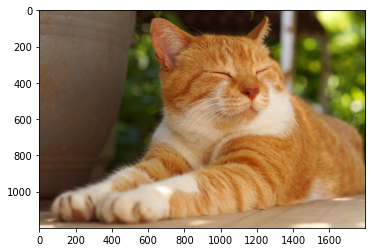

In [1]:
#An Automated Doggy Door

#VGG16: pre-existing model 

#Loading the Model

from tensorflow.keras.applications import VGG16
  
# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG16(weights="imagenet")

#we need to make sure our images match the input dimensions that the model expects
#It is also valuable to understand what the model will return from the final output layer.
model.summary()

#Input dimensions
# the model is expecting images in the shape of (224, 224, 3) corresponding to 224 pixels high, 224 pixels wide, and 3 color channels

#Output dimensions
#We can also see that the model will return a prediction of shape 1000 ( 1000 possible categories that the image will be placed in)
#The dogs are categories 151 through 268. The cats are categories 281 through 285.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Loading an Image
def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)
    
show_image("data/doggy_door_images/happy_dog.jpg")

#Preprocessing the Image
#the final shape of the image needs to be (1, 224, 224, 3)

# preprocess_input methods associated with a specific model, allow users to preprocess their own images to match the qualities of the images that the model was originally trained on.

from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(image_path).shape)
    
    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image

processed_image = load_and_process_image("data/doggy_door_images/brown_bear.jpg")

#Make a Prediction
from tensorflow.keras.applications.vgg16 import decode_predictions

from tensorflow.keras.applications.vgg16 import decode_predictions

def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    predictions = model.predict(image)
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))

#readable_prediction("data/doggy_door_images/happy_dog.jpg")
#readable_prediction("data/doggy_door_images/brown_bear.jpg")
#readable_prediction("data/doggy_door_images/sleepy_cat.jpg")





#Only Dogs 
import numpy as np

def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    preds = model.predict(image)
    if 151<=np.argmax(preds)<= 268:
        print("Doggy come on in!")
    elif 281 <= np.argmax(preds) <= 285:
        print("Kitty stay inside!")
    else:
        print("You're not a dog! Stay outside!")

#doggy_door("data/doggy_door_images/brown_bear.jpg")
doggy_door("data/doggy_door_images/happy_dog.jpg")        
#doggy_door("data/doggy_door_images/sleepy_cat.jpg")        